1.Loading the DATASET

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, label_binarize
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (accuracy_score, confusion_matrix, precision_score, recall_score,
                             f1_score, roc_curve, auc)
from sklearn.multiclass import OneVsRestClassifier

# Load the dataset
# Update file_path with the actual path to your CSV file
file_path = '/content/drive/MyDrive/ml/kerala.CSV'
data = pd.read_csv(file_path)
print(data)
print(data.info())

    SUBDIVISION  YEAR   JAN   FEB   MAR    APR    MAY     JUN     JUL     AUG  \
0        KERALA  1901  28.7  44.7  51.6  160.0  174.7   824.6   743.0   357.5   
1        KERALA  1902   6.7   2.6  57.3   83.9  134.5   390.9  1205.0   315.8   
2        KERALA  1903   3.2  18.6   3.1   83.6  249.7   558.6  1022.5   420.2   
3        KERALA  1904  23.7   3.0  32.2   71.5  235.7  1098.2   725.5   351.8   
4        KERALA  1905   1.2  22.3   9.4  105.9  263.3   850.2   520.5   293.6   
..          ...   ...   ...   ...   ...    ...    ...     ...     ...     ...   
113      KERALA  2014   4.6  10.3  17.9   95.7  251.0   454.4   677.8   733.9   
114      KERALA  2015   3.1   5.8  50.1  214.1  201.8   563.6   406.0   252.2   
115      KERALA  2016   2.4   3.8  35.9  143.0  186.4   522.2   412.3   325.5   
116     KERALA   2017   1.9   6.8   8.9   43.6  173.5   498.5   319.6   531.8   
117      KERALA  2018  29.1  52.1  48.6  116.4  183.8   625.4  1048.5  1398.9   

       SEP    OCT    NOV   

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2.Data Preprocessing

In [ ]:
print(data.head())
print(data.isnull().sum())

  SUBDIVISION  YEAR   JAN   FEB   MAR    APR    MAY     JUN     JUL    AUG  \
0      KERALA  1901  28.7  44.7  51.6  160.0  174.7   824.6   743.0  357.5   
1      KERALA  1902   6.7   2.6  57.3   83.9  134.5   390.9  1205.0  315.8   
2      KERALA  1903   3.2  18.6   3.1   83.6  249.7   558.6  1022.5  420.2   
3      KERALA  1904  23.7   3.0  32.2   71.5  235.7  1098.2   725.5  351.8   
4      KERALA  1905   1.2  22.3   9.4  105.9  263.3   850.2   520.5  293.6   

     SEP    OCT    NOV    DEC   ANNUAL RAINFALL FLOODS  
0  197.7  266.9  350.8   48.4            3248.6    YES  
1  491.6  358.4  158.3  121.5            3326.6    YES  
2  341.8  354.1  157.0   59.0            3271.2    YES  
3  222.7  328.1   33.9    3.3            3129.7    YES  
4  217.2  383.5   74.4    0.2            2741.6     NO  
SUBDIVISION         0
YEAR                0
JAN                 0
FEB                 0
MAR                 0
APR                 0
MAY                 0
JUN                 0
JUL          

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load the dataset
file_path = '/content/drive/MyDrive/ml/kerala.CSV'
data = pd.read_csv(file_path)

# Drop the 'SUBDIVISION' and 'YEAR' columns as they are not needed
data_cleaned = data.drop(['SUBDIVISION', 'YEAR'], axis=1)

# Convert 'FLOODS' column to binary (YES=1, NO=0)
data_cleaned['FLOODS'] = data_cleaned['FLOODS'].map({'YES': 1, 'NO': 0})

# Split the dataset into features (X) and target (y)
X = data_cleaned.drop('FLOODS', axis=1)
y = data_cleaned['FLOODS']

# Optionally scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the Naive Bayes classifier
nb_model = GaussianNB(var_smoothing=1e-9)

# Train the model on the training data
nb_model.fit(X_train, y_train)

# Predict on the test data
y_pred = nb_model.predict(X_test)

# Training and Testing Accuracy
train_accuracy = nb_model.score(X_train, y_train)
test_accuracy = nb_model.score(X_test, y_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the scores
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Training Accuracy: 0.9787234042553191
Testing Accuracy: 0.875
Confusion Matrix:
 [[ 8  2]
 [ 1 13]]
Accuracy: 0.875
Precision: 0.8666666666666667
Recall: 0.9285714285714286
F1 Score: 0.896551724137931


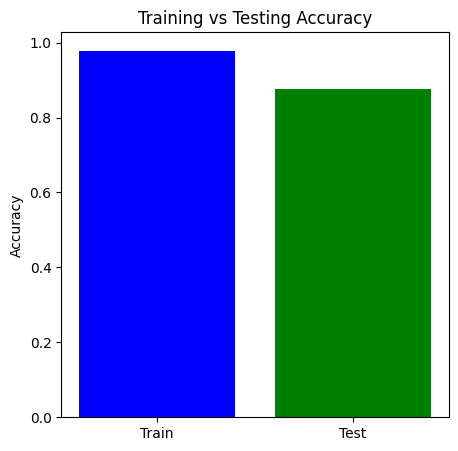

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Assuming you have trained the Naive Bayes model as 'nb_model'
# and already split your data into X_train, X_test, y_train, y_test

# Calculate training accuracy
train_predictions = nb_model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)

# Calculate testing accuracy
test_predictions = nb_model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)

# Plotting training vs testing accuracy
plt.figure(figsize=(5, 5))
plt.bar(['Train', 'Test'], [train_accuracy, test_accuracy], color=['blue', 'green'])
plt.title('Training vs Testing Accuracy')
plt.ylabel('Accuracy')
plt.show()


3.Feature Extraction and Feature selection

Confusion Matrix:
[[ 8  2]
 [ 1 13]]


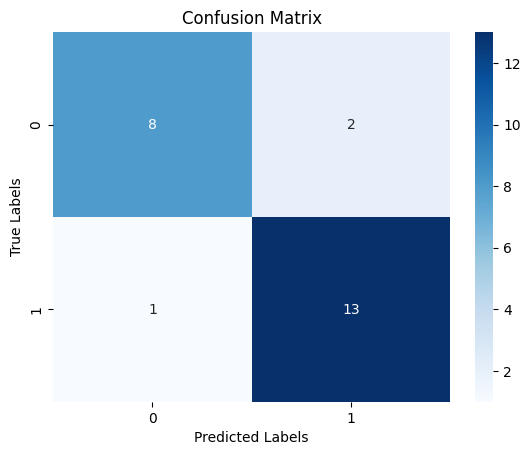

In [ ]:
# Import the necessary libraries
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X_train, X_test, y_train, and y_test are already defined
# Instantiate the Gaussian Naive Bayes model
NB = GaussianNB()

# Fit the model to the training data
NB.fit(X_train, y_train)  # Use X_train and y_train

# Generate predictions
y_pred = NB.predict(X_test)  # Use X_test

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Visualize the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


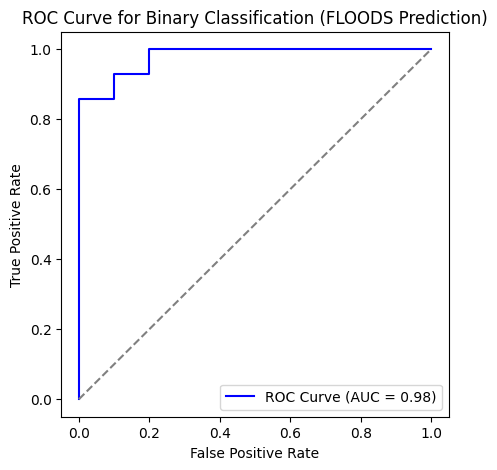

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.naive_bayes import GaussianNB
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt

# Binarize the labels (for binary classification this is not strictly necessary, but included for AUROC)
y_bin = label_binarize(y_test, classes=[0, 1])

# One-vs-Rest (OvR) strategy for AUROC using Naive Bayes
classifier = OneVsRestClassifier(GaussianNB(var_smoothing=1e-9))
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

# Compute AUROC for binary classification
fpr, tpr, _ = roc_curve(y_bin, y_score[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Binary Classification (FLOODS Prediction)')
plt.legend(loc='best')
plt.show()


In [ ]:
# Import necessary libraries
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assuming your data has been preprocessed (X and y are already defined)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optionally scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Logistic Regression model
log_reg = LogisticRegression()

# Fit the model to the training data
log_reg.fit(X_train_scaled, y_train)

# Calculate feature importance (the absolute value of the coefficients)
feature_importance = np.abs(log_reg.coef_).flatten()

# Print the feature importance
print("Feature importance:", feature_importance)


Feature importance: [2.98817403e-01 1.86233556e-01 1.07764599e-01 8.47877322e-02
 7.79984887e-01 1.39334119e+00 1.10096164e+00 1.16629045e+00
 8.96538524e-01 1.49019882e-03 5.58302873e-01 2.47860466e-01
 2.21802435e+00]


In [ ]:
from collections import Counter
print("Class distribution in y_train:", Counter(y_train))
print("Class distribution in y_test:", Counter(y_test))


Class distribution in y_train: Counter({0: 48, 1: 46})
Class distribution in y_test: Counter({1: 14, 0: 10})


In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, log_reg.predict(X_test))
print("Confusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[ 0 10]
 [ 0 14]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [ ]:
import pandas as pd
corr_matrix = pd.DataFrame(X_train).corr().abs()
high_corr_var = np.where(corr_matrix > 0.95)
high_corr_var = [(corr_matrix.index[x], corr_matrix.columns[y]) for x, y in zip(*high_corr_var) if x != y and x < y]
print("Highly correlated features (above 0.95):", high_corr_var)


Highly correlated features (above 0.95): []


In [ ]:
import numpy as np
from sklearn.utils import class_weight

# Example definition of y_train_encoded; replace this with your actual data
y_train_encoded = np.array([0, 1, 0, 1, 0, 1, 1, 0, 1])  # Example data, replace with your own

# Compute class weights
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train_encoded), y=y_train_encoded)
print("Class Weights:", dict(enumerate(class_weights)))


Class Weights: {0: 1.125, 1: 0.9}


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Limit depth of decision tree or random forest
dt_model = DecisionTreeClassifier(max_depth=5)
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5)


4.Classification

--- Naive Bayes ---
Accuracy: 0.875
Precision: 0.8759259259259259
Recall: 0.875
F1 Score: 0.8738656987295826
Confusion Matrix:
 [[ 8  2]
 [ 1 13]]


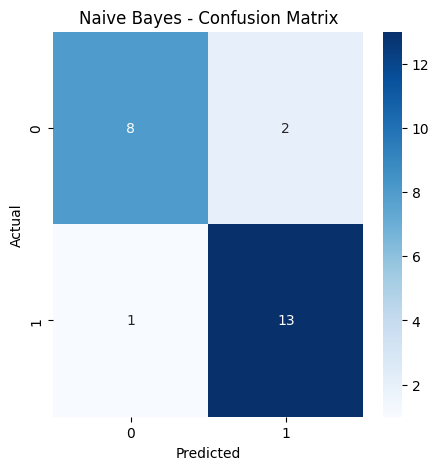

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Import additional libraries for the classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

# Instantiate the label encoder and fit on your training labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)  # Assuming y_train is defined
y_test_encoded = label_encoder.transform(y_test)  # Transform y_test as well

# Function to evaluate model performance
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Print performance metrics
    print(f"--- {model_name} ---")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Confusion Matrix:\n", conf_matrix)

    # Plot confusion matrix
    plt.figure(figsize=(5, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=label_encoder.classes_,
                yticklabels=label_encoder.classes_)
    plt.title(f'{model_name} - Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Naive Bayes (already implemented earlier, just calling the function again)
evaluate_model(nb_model, X_train, X_test, y_train_encoded, y_test_encoded, "Naive Bayes")


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.tree import plot_tree

In [ ]:
# Split the data into features (X) and target (y)
X = dataset.drop(['FLOODS','SUBDIVISION'], axis=1)  # Dropping 'Patient Id' and 'index' columns along with 'Level'
y = dataset['FLOODS']

# Split the data into training and testing sets *after* dropping columns
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a CART model
cart_model = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
cart_model.fit(X_train, y_train) # Now X_train contains only numerical features

DecisionTreeClassifier(random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris

# Load a dataset (for example, the Iris dataset)
data = load_iris()
X, y = data.data, data.target

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNeighborsClassifier
clf = KNeighborsClassifier()

# Fit the classifier on the training data
clf.fit(x_train, y_train)

# Now you can make predictions or evaluate the model
y_pred = clf.predict(x_test)
print("Predictions:", y_pred)


Predictions: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn import neighbors

# Example: Load your data into a pandas DataFrame (replace with your actual data loading)
# Assuming you have a DataFrame named `data` with your features and labels
# For example, you might load data from a CSV file:
# data = pd.read_csv('your_data.csv')

# Splitting the data into features (X) and target (y)
# For example, if your target column is named 'target':
# x_train = data.drop(columns=['target'])
# y_train = data['target']

# Ensure that x_train is defined (this is just a placeholder; replace it with your actual code)
x_train = pd.DataFrame({
    'feature1': ['A', 'B', 'A', 'C'],
    'feature2': ['D', 'D', 'E', 'E']
})
y_train = [0, 1, 0, 1]  # Example target labels

# Create a LabelEncoder object
encoder = LabelEncoder()

# Iterate through all columns in x_train
for col in x_train.columns:
    # Check if the column contains object (string) data
    if x_train[col].dtype == 'object':
        # Fit the encoder on the unique values in the column and transform the column
        x_train[col] = encoder.fit_transform(x_train[col])

# Now you can use the encoded x_train for fitting the model
clf = neighbors.KNeighborsClassifier()
clf.fit(x_train, y_train)


KNeighborsClassifier()

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming you have your features in X and target in y
# X = ...  # Your feature data
# y = ...  # Your target data

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train the CART model (Decision Tree)
cart_model = DecisionTreeClassifier(max_depth=5)
cart_model.fit(X_train, y_train)

# Make predictions
y_pred = cart_model.predict(X_test)

# Print the predictions
print("Predictions:", y_pred)


Predictions: [1 0 0 1 1 0 0 0 1 0 1 0 1 1 1 1 0 1 1 1 0 1 0 1]


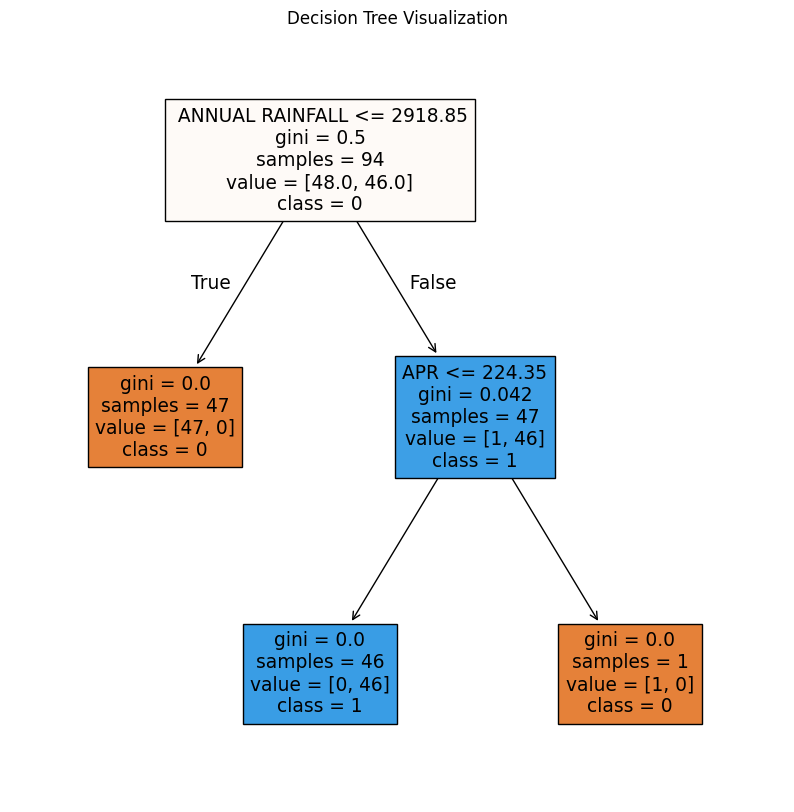

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming 'cart_model' is already trained and 'X' is your feature DataFrame

# Plot the decision tree
plt.figure(figsize=(10, 10))

# Access feature names and convert class names to strings
class_names = label_encoder.classes_.astype(str)  # Convert to string if they're not already

plot_tree(cart_model,
          filled=True,
          feature_names=X.columns,
          class_names=class_names)

plt.title("Decision Tree Visualization")
plt.show()


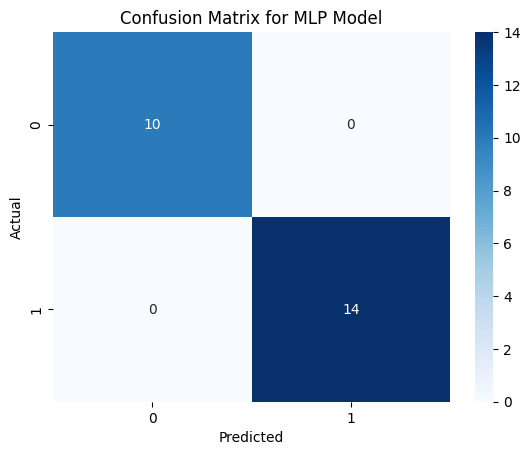

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix visualization
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix for MLP Model')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
